# 5.6.1 Transformaciones con kernels y kernel trick

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, sigmoid_kernel, rbf_kernel, laplacian_kernel, chi2_kernel

import warnings
warnings.filterwarnings("ignore")

Estas metodologías permiten transformar el espacio de entrada (las características) a un espacio no lineal, con el fin de hacer el problema tratable por las metodologías disponibles.

En el siguiente ejemplo, las dos clases no son linealmente separables. Mediante la transformación a un espacio dimensional mayor:

$$ (x_1,x_2) -> →(x_1,x_2,x_1^2+x_2^2) $$

las clases se hacen linealmente separables. Note que explicitamente se están computando nuevas columnas en el dataset cuando se agrega la nueva columna $x_1^2+x_2^2$.

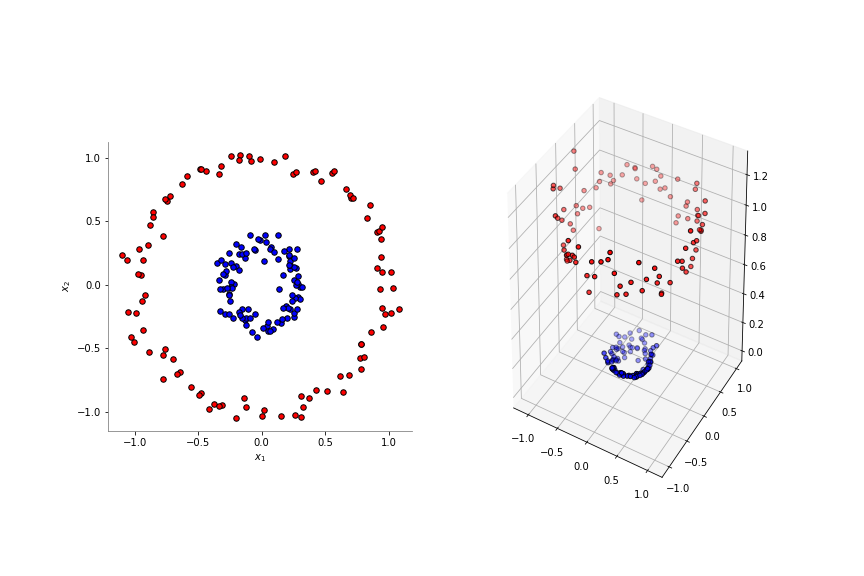

Desde el punto de vista conceptual, existe un número infinito de transformaciones que podrían aumentar la dimensionalidad de los datos, pero muchas de ellas son imprácticas y costosas computacionalmente.

En los métodos de kernel, se soluciona este problema al representar los datos con una matriz $K$ de $n×n$ (donde $n$ es la cantidad de ejemplos del dataset), donde el elemento $k_{ij}$ corresponde a una comparación de la similitud entre los ejemplos (o patrones) $x_i$ y $x_j$. Esto se conoce con el nombre de kernel trick.

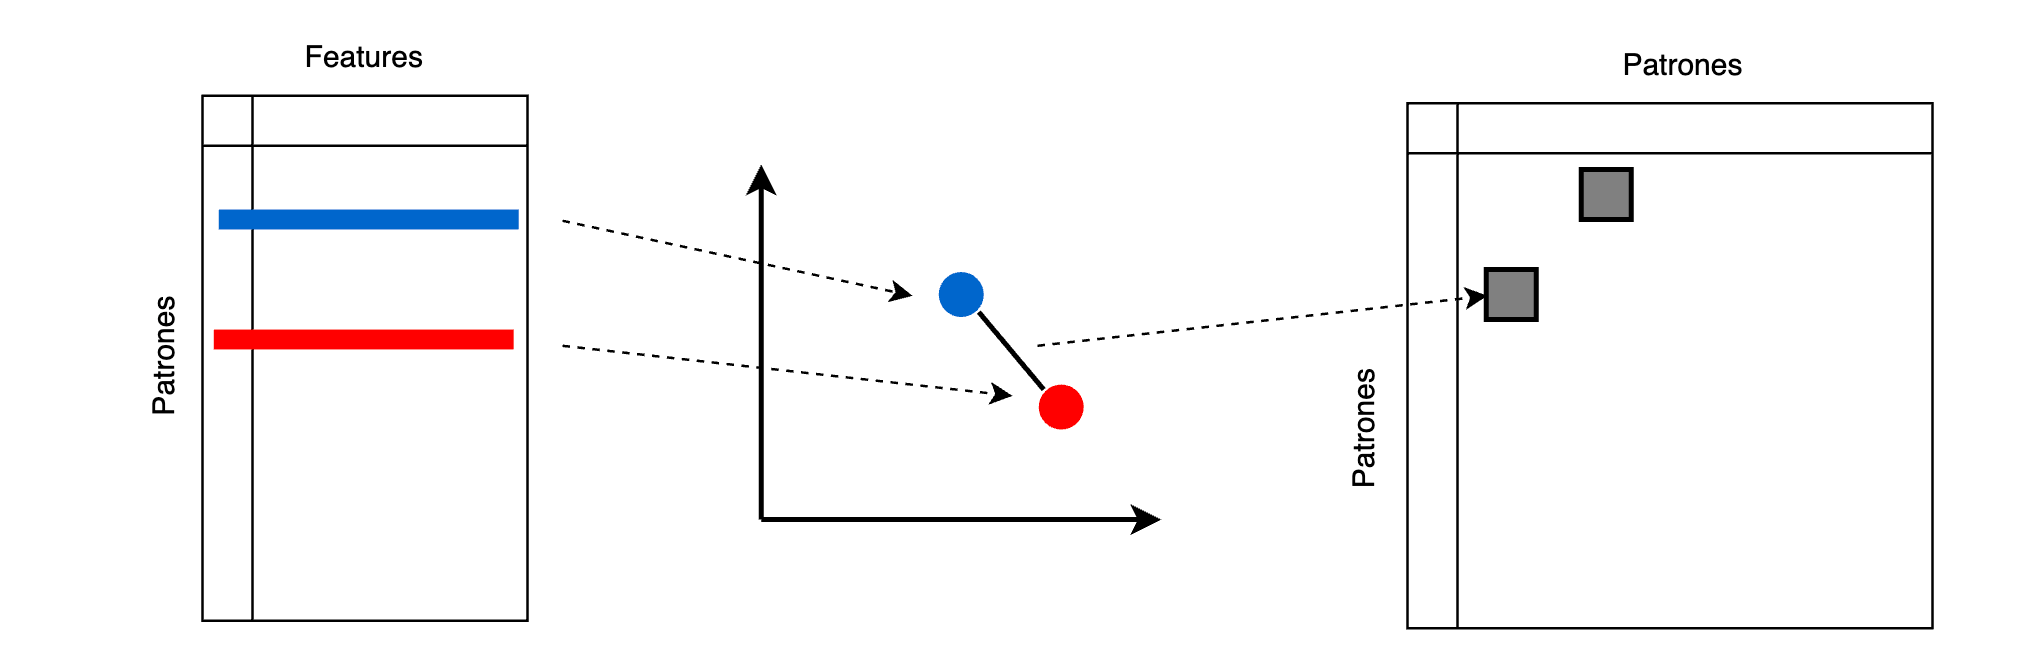

Una función kernel es una función cuyas entradas son los patrones del dataset y retorna su producto punto.

Si $x$ y $z$ son dos filas del dataset (patrones) y $\phi()$ es una función, entonces una función kernel se define como:

$$ k(x,z) = \phi(x)^T . \phi(<>) $$

Como ejemplo, considere el siguiente kernel lineal:

$$ k(x,y) = x^{T}y $$

para:

In [3]:
x = [
    [1, 2],
    [3, 4],
    [5, 6],
]

entonces será igual a:

$$ k(x_1, x_1) = 1×1+2×2 = 5 $$

$$ k(x_1, x_2) = 1×3+2×4 = 11 $$

y asi sucesivamente.

## 5.6.1.1 Kernel Lineal

$$ k(x,y) = x^{T}y $$

In [4]:
linear_kernel(X=x, Y=x)

array([[ 5., 11., 17.],
       [11., 25., 39.],
       [17., 39., 61.]])

In [5]:
linear_kernel(X=x)

array([[ 5., 11., 17.],
       [11., 25., 39.],
       [17., 39., 61.]])

## 5.6.1.2 Kernel polinomial

$$ k(x,y) = (\gamma x^{T}y + C_{0})^2 $$

In [6]:
polynomial_kernel(
    X=x,
    Y=x,
    degree=2,
    gamma=1,
    coef0=0,
)

array([[  25.,  121.,  289.],
       [ 121.,  625., 1521.],
       [ 289., 1521., 3721.]])

## 5.6.1.3 Kernel sigmoidal

$$ k(x,y) = tanh(\gamma x^{T}y + C_{0}) $$

In [7]:
sigmoid_kernel(
    X=x,
    Y=x,
    gamma=1,
    coef0=0,
)

array([[0.9999092, 1.       , 1.       ],
       [1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       ]])

## 5.6.1.4 Kernel RBF

$$ k(x,y) = exp(\gamma || x - y ||^2 ) $$

In [8]:
rbf_kernel(
    X=x,
    Y=x,
    gamma=1,
)

array([[1.00000000e+00, 3.35462628e-04, 1.26641655e-14],
       [3.35462628e-04, 1.00000000e+00, 3.35462628e-04],
       [1.26641655e-14, 3.35462628e-04, 1.00000000e+00]])

## 5.6.1.5 Kernel Laplaciano

$$ k(x,y) = exp(- \gamma || x - y ||_{1} ) $$

donde $ ||x - y||_1 $ representa la distancia de Manhattan entre los dos puntos.

In [9]:
laplacian_kernel(
    X=x,
    Y=x,
    gamma=1,
)

array([[1.00000000e+00, 1.83156389e-02, 3.35462628e-04],
       [1.83156389e-02, 1.00000000e+00, 1.83156389e-02],
       [3.35462628e-04, 1.83156389e-02, 1.00000000e+00]])

## 5.6.1.6 Kernel Chi-cuadrado

$$ k(x,y) = exp(- \gamma \sum_{}^{} \frac{(x_i - y_i)^2}{(x_i + y_i)} ) $$

In [10]:
chi2_kernel(
    X=x,
    Y=x,
    gamma=1,
)

array([[1.        , 0.1888756 , 0.00940356],
       [0.1888756 , 1.        , 0.40656966],
       [0.00940356, 0.40656966, 1.        ]])

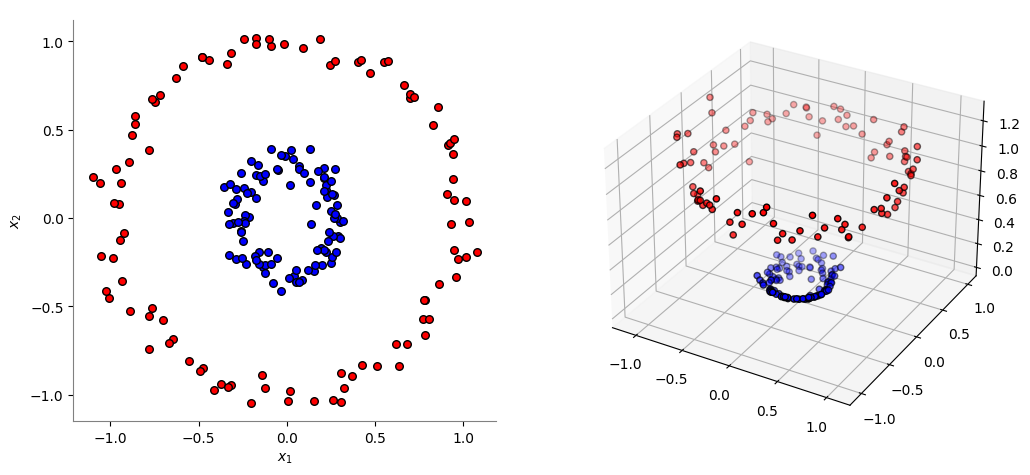

In [11]:
def fig1():

    np.random.seed(0)

    X, y = make_circles(n_samples=200, factor=0.3, noise=0.05)

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1, aspect="equal")

    reds = y == 0
    blues = y == 1

    plt.scatter(X[reds, 0], X[reds, 1], c="red", s=30, edgecolor="k")
    plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=30, edgecolor="k")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X_transf = np.c_[X, X[:, 0] ** 2 + X[:, 1] ** 2]

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    ax = plt.subplot(1, 2, 2, projection="3d")
    ax.scatter(
        X_transf[reds, 0],
        X_transf[reds, 1],
        X_transf[reds, 2],
        marker="o",
        c="red",
        edgecolor="k",
    )
    ax.scatter(
        X_transf[blues, 0],
        X_transf[blues, 1],
        X_transf[blues, 2],
        marker="o",
        c="blue",
        edgecolor="k",
    )

    # plt.savefig("assets/kernel_transf.png")
    # plt.close()


fig1()

In [12]:
print('ok_')

ok_
